In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from pandas.core.common import random_state
from sklearn.linear_model import LinearRegression

In [39]:
df = pd.read_csv('Daily_Currency_Trends.csv')
df.head()

,Date,USD_Price,GBP_Price,CAD_Price,AUD_Price
0,1999-01-01,42.490000,69.928000,28.130000,26.792000
1,1999-01-02,42.496129,69.878516,28.135548,26.779645
2,1999-01-03,42.502258,69.829032,28.141097,26.767290
3,1999-01-04,42.508387,69.779548,28.146645,26.754935
4,1999-01-05,42.514516,69.730065,28.152194,26.742581


In [40]:
df.describe()

,USD_Price,GBP_Price,CAD_Price,AUD_Price
count,9497.000000,9497.000000,9497.000000,9497.000000
mean,57.460789,85.520304,46.136608,43.180389
std,13.705012,11.764741,10.503573,10.912421
min,39.195000,66.135000,28.120000,22.670000
25%,45.543548,75.871500,37.099333,33.496233
50%,50.973929,84.228645,48.379677,47.779133
75%,68.588000,96.161800,54.707300,53.487000
max,85.554000,111.980000,62.785000,58.447000


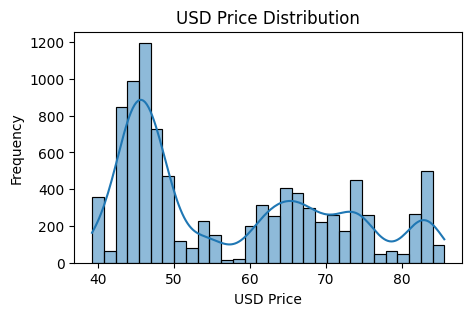

In [41]:
plt.figure(figsize=(5, 3))
plt.title('USD Price Distribution')
sns.histplot(df['USD_Price'], bins=30, kde=True)
plt.xlabel('USD Price')
plt.ylabel('Frequency')
plt.show()

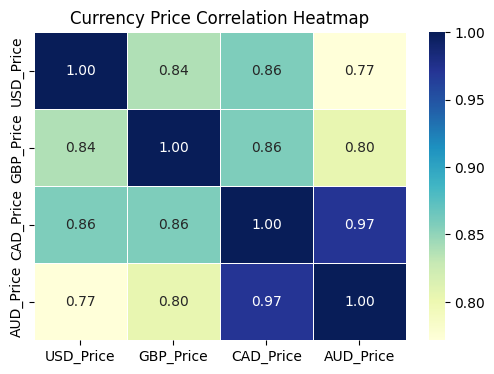

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = df.drop(columns=['Date']).corr()

plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, cmap='YlGnBu', annot=True, fmt=".2f", linewidths=0.5)

plt.title('Currency Price Correlation Heatmap')
plt.show()


In [45]:
X = df[ 'USD_Price' ]
y = df[ 'GBP_Price' ]

In [46]:
X_train, X_test, y_train, y_test = train_test_split( X, y, train_size = 0.7, test_size = 0.3, random_state = 100 )

In [47]:
print( X_train.shape )
print( X_test.shape )
print( y_train.shape )
print( y_test.shape )

(6647,)
(2850,)
(6647,)
(2850,)


In [48]:
import statsmodels.api as sm

In [49]:
# Add a constant to get an intercept
X_train_sm = sm.add_constant(X_train)
# Fit the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

In [50]:
# Print the parameters,i.e. intercept and slope of the regression line obtained
lr.params

const        44.420820
USD_Price     0.715572
dtype: float64

In [51]:
#Performing a summary operation lists out all different parameters of the regression line fitted
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:              GBP_Price   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                 1.550e+04
Date:                Sun, 23 Feb 2025   Prob (F-statistic):               0.00
Time:                        13:03:28   Log-Likelihood:                -21779.
No. Observations:                6647   AIC:                         4.356e+04
Df Residuals:                    6645   BIC:                         4.358e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         44.4208      0.339    130.882      0.0